In [1]:
#/users/PCON0003/cond0080/DMASS/blinded_dmass_y1_small_scale

%pylab inline
import os
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
import dark_emulator
from dark_emulator import model_hod

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


Populating the interactive namespace from numpy and matplotlib
colossus is not installed.


In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Initialization of a python class that sets cosmology, halo occupation distribution parameters (HOD), and more
hod = model_hod.darkemu_x_hod({"fft_num":8})

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [4]:
cparam = np.array([0.02225,0.1198,0.6844,3.094,0.9645,-1.])
hod.set_cosmology(cparam)

gparam = {"logMmin":14.13, "sigma_sq":0.22, "logM1": 14.21, "alpha": 1.13, "kappa": 1.25, # HOD parameters
           "poff": 0.2, "Roff": 0.1, # off-centering parameters p_off is the fraction of off-centered galaxies. Roff is the typical off-centered scale with respect to R200m.
           "sat_dist_type": "emulator", # satellite distribution. Chosse emulator of NFW. In the case of NFW, the c-M relation by Diemer & Kravtsov (2015) is assumed.
           "alpha_inc": 0.44, "logM_inc": 13.57} # incompleteness parameters. For details, see More et al. (2015)
hod.set_galaxy(gparam)

INFO:root:Got same cosmology. Keep quantities already computed.


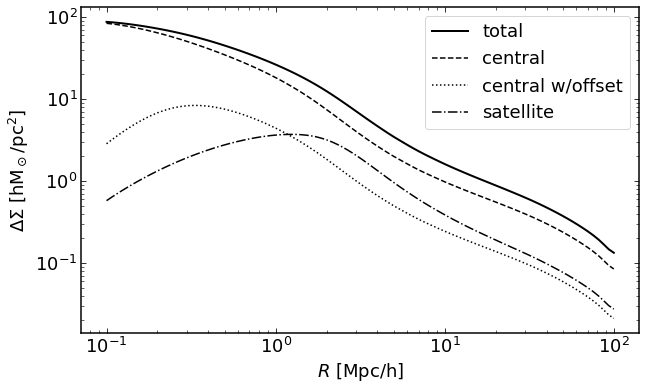

In [11]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

# Currently getting a lot of matplotlib debug messages I need to figure out
redshift = 0.55  # This is roughly the midpoint of the CMASS redshift range (0.43-0.7)
r = np.logspace(-1,2,100)  # Somewhat arbitrary choice of physical separation "r"

plt.figure(figsize=(10,6))

# Plot each of the different halo model components
plt.loglog(r, hod.get_ds(r, redshift), linewidth = 2, color = "k", label = "total")
plt.loglog(r, hod.get_ds_cen(r, redshift), "--", color = "k", label = "central")
plt.loglog(r, hod.get_ds_cen_off(r, redshift), ":", color = "k", label = "central w/offset")
plt.loglog(r, hod.get_ds_sat(r, redshift), "-.", color = "k", label = "satellite")

plt.xlabel(r"$R$ [Mpc/h]")
plt.ylabel(r"$\Delta\Sigma$ [hM$_\odot$/pc$^2$]")
plt.legend()

In [12]:
# changing parameters:

#log(Mmin) -- default value: 13.13
# increased: satellites make up more of the total-- satellites peak (higher peak) at higher radius
# decreased: Central make up more of the total (changes slightly)-- satellites peak (lower peak) at lower radius

#sig_logMh -- default value: 0.22
# increased:
# decreased: 

#log(M1) -- default value: 14.21
# increased:
# decreased: 

#alpha -- default value: 1.13
# increased:
# decreased: 

#kappa -- default value: 1.25
# increased:
# decreased: 

In [13]:
#dens_to_mass(dens, redshift, nint=20, integration='quad')
#Convert the cumulative number density to the halo mass threshold for the current cosmological model at
#redshift z.
#Parameters
#• dens (float) – halo number density in (h−1Mpc)−3
#• redshift (float) – redshift
#• nint (int, optional) – number of sampling points in log(M) used for interpolation
#• integration (str, optional) – type of integration (default: “quad”, “trapz” is also supported)
#Returns mass threshold in [h−1𝑀⊙]
#Return type float

#do more with this?

In [14]:
#get_xicross_massthreshold(xs, Mthre, redshift)
#Compute the halo-matter cross correlation function 𝜉𝑕𝑚(𝑥; > 𝑀th) for a mass threshold halo sample

#Parameters
#• xs (numpy array) – Separations in [h−1Mpc]
#• Mthre (float) – Minimum mass threshold of a halo sample in [h−1𝑀⊙]
#• redshift (float) – redshift at which the power spectrum is evaluated
#Returns Halo-matter cross correlation function

In [4]:
from dark_emulator import darkemu
emu = darkemu.base_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


Text(0, 0.5, '$\\xi_\\mathrm{hm}(x)$')

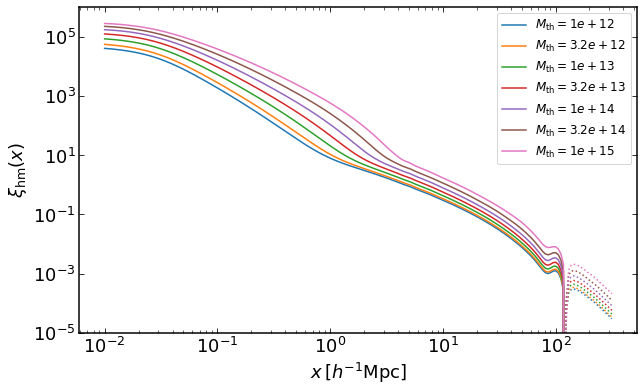

In [5]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

rs = np.logspace(-2,2.5,200)
plt.figure(figsize=(10,6))
z = 0
for i, Mmin in enumerate(np.logspace(12,15,7)):
    xihm = emu.get_xicross_massthreshold(rs,Mmin,z)
    plt.loglog(rs,xihm,color="C{}".format(i),label='$M_\mathrm{th}=%0.2g$' %Mmin)
    plt.loglog(rs,-xihm,':',color="C{}".format(i))
plt.legend(fontsize=12)
plt.ylim(0.00001,1000000)
plt.xlabel("$x\,[h^{-1}\mathrm{Mpc}]$")
plt.ylabel("$\\xi_\mathrm{hm}(x)$")

In [6]:
fdir = '/users/PCON0003/cond0080/DMASS/blinded_dmass_y1_small_scale'
filein = 'simulated_y1_dmass_3x2pt_baseline_small_scales.fits'

# Open up the file
hdu = fits.open(os.path.join(fdir, filein))

# The galaxy-galaxy lensing signal is stored here with the name "galaxy_shear_xi"
# Ignore the other extensions for now, they correspond to cosmic shear and galaxy clustering
ggl_hdu_header = hdu[3].header
ggl_hdu = hdu[3].data

# Printing ggl_hdu_header indicates that ggl_hdu contains bin1, bin2, angbin, value, ang
# where bin1 is the redshift bin number for the foreground positions (here for DMASS this is always 1)
# bin2 is the redshift bin number for the background source galaxy shapes (there are four source redshift bins in total)
print(ggl_hdu_header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   40 / length of dimension 1                          NAXIS2  =                  120 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    5 / number of table fields                         2PTDATA =                    T                                                  EXTNAME = 'galaxy_shear_xi'                                                     QUANT1  = 'GPR     '                                                            QUANT2  = 'G+R     '                                                            KERNEL_1= 'nz_lens '                    

In [6]:
print(ggl_hdu.dtype)

(numpy.record, [('BIN1', '>i8'), ('BIN2', '>i8'), ('ANGBIN', '>i8'), ('VALUE', '>f8'), ('ANG', '>f8')])


In [7]:
#bin1 is the redshift bin number for the foreground positions (here for DMASS this is always 1)
#bin2 is the redshift bin number for the background source galaxy shapes (there are four source redshift bins in total)
#angbin is the number of the theta bin
#value is gamma_t for the given theta bin
#ang is the theta value.

In [7]:
redshift_bin_lens = ggl_hdu['BIN1'] # [1]
redshift_bin_source = ggl_hdu['BIN2'] # [1234]
num_theta_bin = ggl_hdu['ANGBIN'] # 0-29 *4
gamma_t = ggl_hdu['VALUE']
theta = ggl_hdu['ANG']

In [8]:
redshift_bin4_source = redshift_bin_source[ggl_hdu['BIN2']==4]
gamma_t4 = ggl_hdu['VALUE'][ggl_hdu['BIN2']==4]
theta4 = ggl_hdu['ANG'][ggl_hdu['BIN2']==4]

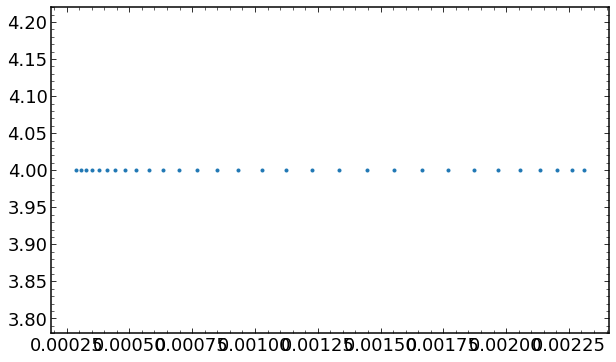

In [10]:
# random plots:
fig, ax = plt.subplots()
ax.plot( gamma_t4, redshift_bin4_source, '.')

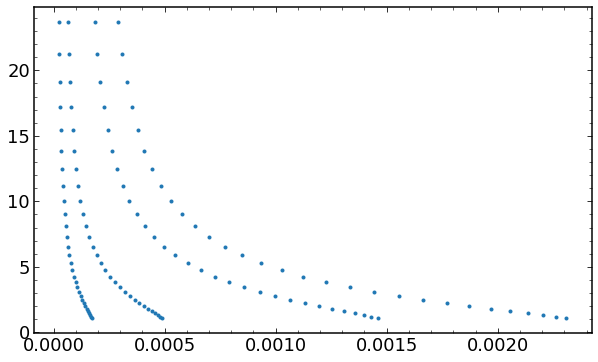

In [23]:
# plot theta vs gamma_t:
fig, ax = plt.subplots()
ax.plot( gamma_t, theta, '.')

In [9]:
import twopoint

des_filename = '/users/PCON0003/cond0080/DMASS/blinded_dmass_y1_small_scale/simulated_y1_dmass_3x2pt_baseline_small_scales'
des_file = des_filename +'.fits'
# the simulated fits file does not include covariance information
Td = twopoint.TwoPointFile.from_fits(des_file,covmat_name=None)

Saving /users/PCON0003/warner785/2point/small_scale_shear_nz_source
Saving /users/PCON0003/warner785/2point/small_scale_shear_nz_lens


<Figure size 720x432 with 0 Axes>

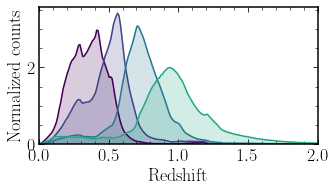

<Figure size 720x432 with 0 Axes>

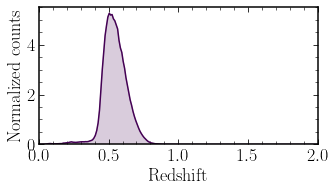

In [25]:
# Plot the lens and source redshift distributions
# The first argument is the location and prefix for the image files (in png format)

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

Td.plots('/users/PCON0003/warner785/2point/small_scale_shear', colormap='viridis', savepdf=False, latex=True, plot_spectrum=False, plot_kernel=True, plot_cov=False, cov_vmin=None, sharey=True, save_pickle=False, load_pickle=False, remove_pickle=True,label_legend = None, blind_yaxis=False, shade_until=None)

In [26]:
import fitsio

f = fitsio.FITS(des_file, 'r')
print(f)


  file: /users/PCON0003/cond0080/DMASS/blinded_dmass_y1_small_scale/simulated_y1_dmass_3x2pt_baseline_small_scales.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      shear_xi_plus
  2      BINARY_TBL      shear_xi_minus
  3      BINARY_TBL      galaxy_shear_xi
  4      BINARY_TBL      galaxy_xi
  5      BINARY_TBL      nz_source
  6      BINARY_TBL      nz_lens


In [27]:
nz = f[6].read()

In [28]:
print(nz.dtype)

[('Z_LOW', '>f8'), ('Z_MID', '>f8'), ('Z_HIGH', '>f8'), ('BIN1', '>f8')]


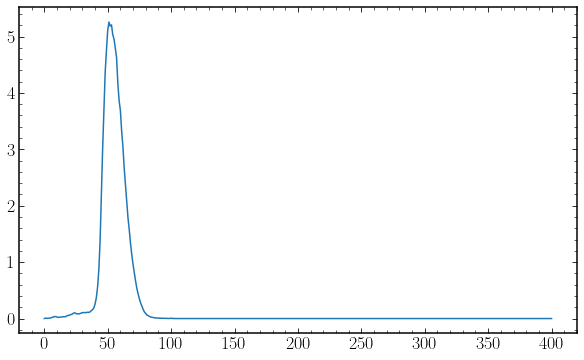

In [29]:
plt.plot(nz['BIN1'])

In [30]:
# Plot gamma t and clustering
# For some reasons, these plots and not shown in the notebook but only appear on disk
Td.plots('/users/PCON0003/warner785/2point/small_scale_shear', colormap='viridis', savepdf=False, latex=True, plot_spectrum=True, plot_kernel=False, plot_cov=False, cov_vmin=None, sharey=True, save_pickle=False, load_pickle=False, remove_pickle=True,label_legend = None, blind_yaxis=False, shade_until=None)

Name /users/PCON0003/warner785/2point/small_scale_shear_shear_xi_plus bins1 4 bins2 4
k 0, pair (1, 1)
k 1, pair (1, 2)
k 2, pair (1, 3)
k 3, pair (1, 4)
k 4, pair (2, 2)
k 5, pair (2, 3)
k 6, pair (2, 4)
k 7, pair (3, 3)
k 8, pair (3, 4)
k 9, pair (4, 4)
Saving /users/PCON0003/warner785/2point/small_scale_shear_shear_xi_plus


Name /users/PCON0003/warner785/2point/small_scale_shear_shear_xi_minus bins1 4 bins2 4
k 0, pair (1, 1)
k 1, pair (1, 2)
k 2, pair (1, 3)
k 3, pair (1, 4)
k 4, pair (2, 2)
k 5, pair (2, 3)
k 6, pair (2, 4)
k 7, pair (3, 3)
k 8, pair (3, 4)
k 9, pair (4, 4)
Saving /users/PCON0003/warner785/2point/small_scale_shear_shear_xi_minus


Name /users/PCON0003/warner785/2point/small_scale_shear_galaxy_shear_xi bins1 1 bins2 4
k 0, pair (1, 1)
0, (1, 1), (4,)
k 1, pair (1, 2)
1, (1, 2), (4,)
k 2, pair (1, 3)
2, (1, 3), (4,)
k 3, pair (1, 4)
3, (1, 4), (4,)
Saving /users/PCON0003/warner785/2point/small_scale_shear_galaxy_shear_xi


Name /users/PCON0003/warner785/2point/small_scale_shear_galaxy_xi bins1 1 bins2 1
k 0, pair (1, 1)
Saving /users/PCON0003/warner785/2point/small_scale_shear_galaxy_xi


In [10]:
# getting delta sigma

# not the integral

from astropy.cosmology import Planck15 as cosmo
from astropy.constants import c, G
from astropy import units as u
import numpy as np
from scipy import interpolate
from scipy.signal import savgol_filter
import esutil as eu
import os

#sig_crit(zl, zs):
""" Sigma crit, e.g. Eq. 8 of https://arxiv.org/pdf/1805.00039.pdf
Return units in Msun/pc**2
"""
#pre = (c.to(u.parsec/u.s)**2)/(4.*np.pi*G.to(u.parsec**3/(u.M_sun * u.s**2)))
#z_ratio = ang_diam_dist(zs)/(ang_diam_dist(zl)*ang_diam_dist(zl, zs))

print(G.to(u.parsec**3/(u.M_sun * u.s**2)))
print(c.to(u.parsec/u.s))
print(c.to(u.parsec/u.s)**2)

#print(ang_diam_dist(.5))

4.517103050001135e-30 pc3 / (s2 solMass)
9.715611890256316e-09 pc / s
9.439311440208991e-17 pc2 / s2


In [15]:
import sys
sys.path.append('/users/PCON0003/warner785/lilo/scripts/')

from delta_sigma_util import *
import fitsio

#load a lens and source redshift distribution as an example
# use the DES y3 3x2 data vector (maglim)
# find this here https://github.com/des-science/y3-3x2pt 
des_filename = '/users/PCON0003/cond0080/DMASS/blinded_dmass_y1_small_scale/simulated_y1_dmass_3x2pt_baseline_small_scales'
des_file = des_filename +'.fits'
# the simulated fits file does not include covariance information

#Td = twopoint.TwoPointFile.from_fits(des_file,covmat_name=None)
tp = fitsio.FITS(des_file, 'r')


#load the example n(z)
source_z = tp['nz_source']['z_HIGH'].read()
source_nz = tp['nz_source']['BIN4'].read()

lens_z = tp['nz_lens']['z_HIGH'].read()
lens_nz = tp['nz_lens']['BIN1'].read()
mean_lens_z = np.average(lens_z, weights=lens_nz)

#remove the long tail of zeros to speed up integration
selectz = (lens_z < 1.0)
lens_z  = lens_z[selectz]
lens_nz = lens_nz[selectz]


sigc_s  = sigma_crit_inv_source_av(mean_lens_z, source_z, source_nz)
#zs_grid = source_z

sigc_sl = sigma_crit_inv_source_lens_av(lens_z, lens_nz, source_z, source_nz)

sigc_eff = sig_crit_inv_eff(lens_z, lens_nz, source_z, source_nz)

In [14]:
#checking from Jack's first run:

def sig_crit_inv(zl, zs):
    if zl >= zs:
        return 0 * u.kg / (u.m * u.Mpc)
    else:
        Dl = cosmo.angular_diameter_distance(zl)
        Ds = cosmo.angular_diameter_distance(zs)
        Dls = cosmo.angular_diameter_distance_z1z2(zl,zs)
        return ((4.*np.pi*G)/(c**2.)) * ((Dls*Dl)/Ds)

def sig_crit_inv_eff(z_l, nz_l, z_s, nz_s):
    """
    integrates over two n(z) to get an effective sigma crit (as in Prat, Sanchez et al)
    """
    #normalize nz
    l_area = np.trapz(nz_l, x=z_l)
    nz_l = nz_l/l_area
    s_area = np.trapz(nz_s, x=z_s)
    nz_s = nz_s/s_area
    
    source_integral = np.zeros(len(z_l))
    for i_l in range(len(z_l)):  
        sig_crit_inv_s = np.array([sig_crit_inv(z_l[i_l], z_s[i_s]).value for i_s in range(len(z_s))])
        source_integral[i_l] = np.trapz(sig_crit_inv_s*nz_s, x=z_s)
    sig_crit_inv_eff = np.trapz(nz_l*source_integral, x=z_l)
    
    return sig_crit_inv_eff*((u.m * u.Mpc)/u.kg )

print(G)

#check constants
# ang. diameter distance ratios

  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014


In [ ]:
#print(source_z)
print(tp['nz_source']['z_MID'].read())
print(tp['nz_lens']['z_MID'].read())
# because there is a zero entry at beginning of z_MID -- source galaxy is at the observer --- This does not make sense

[0.00230858 0.00226161 0.00220373 0.00213486 0.00205586 0.00196764
 0.00187184 0.00177002 0.00166386 0.00155491 0.00144477 0.00133517
 0.00122791 0.0011245  0.00102625 0.00093398 0.00084853 0.00077015
 0.00069905 0.00063505 0.00057794 0.00052729 0.0004826  0.00044335
 0.00040889 0.00037869 0.00035209 0.00032858 0.00030759 0.00028867]
[ 1.05511306  1.17461894  1.30766049  1.45577079  1.6206566   1.80421796
  2.00857014  2.23606798  2.48933303  2.7712838   3.08516931  3.43460663
  3.82362246  4.25669961  4.73882864  5.27556532  5.87309472  6.53830243
  7.27885395  8.10328298  9.0210898  10.0428507  11.18033989 12.44666517
 13.85641899 15.42584657 17.17303313 19.11811228 21.28349806 23.69414318]
2.685674505252198e-10 pc2 / solMass
[6930215.14174371 6789207.75155792 6615456.8350522  6408724.0933332
 6171554.57522953 5906716.98713597 5619152.90915472 5313498.09364014
 4994811.13035329 4667734.14312838 4337097.14756334 4008097.89597405
 3686096.71469998 3375665.83703353 3080725.58789656 2803

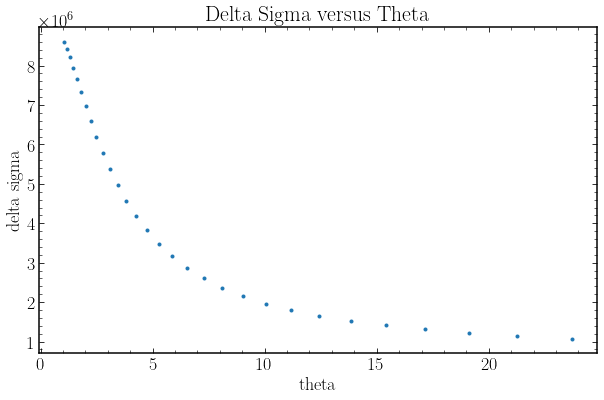

In [39]:
print(gamma_t4)
print(theta4)
print(sigc_sl)

delta_sigma = gamma_t4/sigc_sl

# label plot:
fig, ax = plt.subplots()
plt.xlabel("theta")
plt.ylabel("delta sigma")
plt.title('Delta Sigma versus Theta')
ax.plot( theta4, delta_sigma, '.')
fig.savefig('delta_sigma_theta.pdf')

#convert theta to R

# to check this --
# sigma_crit calculation 
# 1) understanding function and use is correct
# 2) check cited paper for comparison of equation
# or:
# amplitude of gamma_t too different?--- check common values for these theta (order of mag)

# test of where sigma_crit is wrong: single lens, single source redshift --ideal case:
print(sig_crit(.5, 1)*gamma_t4) # not correct (look in code-- units)

[0.00230858 0.00226161 0.00220373 0.00213486 0.00205586 0.00196764
 0.00187184 0.00177002 0.00166386 0.00155491 0.00144477 0.00133517
 0.00122791 0.0011245  0.00102625 0.00093398 0.00084853 0.00077015
 0.00069905 0.00063505 0.00057794 0.00052729 0.0004826  0.00044335
 0.00040889 0.00037869 0.00035209 0.00032858 0.00030759 0.00028867]
[ 1.05511306  1.17461894  1.30766049  1.45577079  1.6206566   1.80421796
  2.00857014  2.23606798  2.48933303  2.7712838   3.08516931  3.43460663
  3.82362246  4.25669961  4.73882864  5.27556532  5.87309472  6.53830243
  7.27885395  8.10328298  9.0210898  10.0428507  11.18033989 12.44666517
 13.85641899 15.42584657 17.17303313 19.11811228 21.28349806 23.69414318]
4.167577606467646e-24 m Mpc / kg
[5.53938691e+20 5.42667836e+20 5.28779760e+20 5.12255415e+20
 4.93298230e+20 4.72129509e+20 4.49144239e+20 4.24712959e+20
 3.99240007e+20 3.73096432e+20 3.46668302e+20 3.20371079e+20
 2.94633218e+20 2.69820183e+20 2.46245328e+20 2.24106997e+20
 2.03603449e+20 1.847

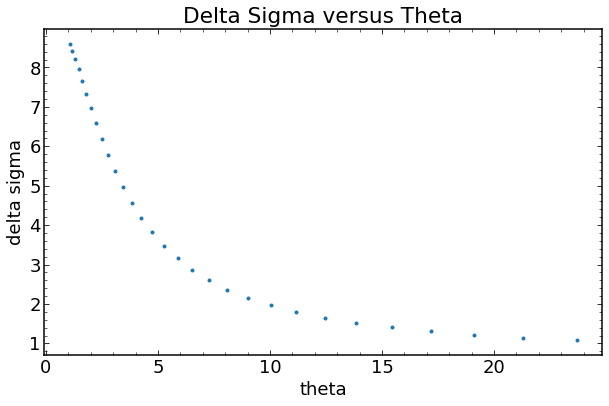

In [19]:
print(gamma_t4)
print(theta4)
print(sigc_eff)

print(gamma_t4/sigc_eff)
delta_sigma = (gamma_t4/sigc_eff).to(u.M_sun*u.pc**-2)
print(delta_sigma)
# label plot:
fig, ax = plt.subplots()
plt.xlabel("theta")
plt.ylabel("delta sigma")
plt.title('Delta Sigma versus Theta')
ax.plot( theta4, delta_sigma, '.')
fig.savefig('delta_sigma_theta.pdf')

#convert theta to R

# to check this --
# sigma_crit calculation 
# 1) understanding function and use is correct
# 2) check cited paper for comparison of equation
# or:
# amplitude of gamma_t too different?--- check common values for these theta (order of mag)

# test of where sigma_crit is wrong: single lens, single source redshift --ideal case:
print(sig_crit(.5, 1)*gamma_t4) # not correct (look in code-- units)

In [ ]:
def sigma_crit_inv_source_av(zl, zs_grid, nz_source, use_trapz=True):
    """Integrate sigma crit inverse over source distribution
    Numerical intergation is uses trapz or "mid-point"

    zl: float
        single lens redshift to evalutate sigma_crit at
    zs_grid: 1d array
        grid of redshifts at which source n(z) has been evaluated
    nz_source: 1d array
        source n(z)
    """
    if zs_grid[0] == 0.:
        raise IOError('zs_grid should not have a 0.0 entry')
    sig_crit_inv_unit = (1./sig_crit(zl, zs_grid[-1])).unit

    sig_crit_inv_at_zs = np.array([sig_crit(zl, z1).value**-1 for z1 in zs_grid])  * sig_crit_inv_unit

    if use_trapz == True:
        nz_source = nz_source/np.trapz(nz_source,zs_grid) #normalize the source n(z)
        sig_crit_averaged = np.trapz(nz_source*sig_crit_inv_at_zs, zs_grid)
    else:
        sig_crit_averaged = np.sum(nz_source*sig_crit_inv_at_zs)/np.sum(nz_source)
    
    return sig_crit_averaged

def sigma_crit_inv_source_lens_av(zl_grid, nz_lens, zs_grid, nz_source, use_trapz=True):
    """Integrate sigma crit inverse over source and lens distribution
    Numerical intergation is uses trapz or "mid-point"

    zl_grid: 1d array
        grid of redshifts at which lens n(z) has been evaluated
    nz_lens: 1d array
        lens n(z)
    zs_grid: 1d array
        grid of redshifts at which source n(z) has been evaluated
    nz_source: 1d array
        source n(z)
    """
    sig_crit_inv_unit = sigma_crit_inv_source_av(zl_grid[0], zs_grid, nz_source, use_trapz=use_trapz).unit
    
    sig_crit_source_at_zl = np.array([ sigma_crit_inv_source_av(z1, zs_grid, nz_source, use_trapz=use_trapz).value for z1 in zl_grid]) *sig_crit_inv_unit

    if use_trapz == True:
        nz_lens = nz_lens/np.trapz(nz_lens,zl_grid) #normalize the lens n(z)
        sig_crit_averaged = np.trapz(nz_lens*sig_crit_source_at_zl, zl_grid)
    else:
        sig_crit_averaged = np.sum(nz_lens*sig_crit_source_at_zl)/np.sum(nz_lens)
    
    return sig_crit_averaged

In [ ]:
#TEST

import sys
sys.path.append('/users/PCON0003/warner785/lilo/scripts/')

from delta_sigma_util import *
import fitsio

#load a lens and source redshift distribution as an example
# use the DES y3 3x2 data vector (maglim)
# find this here https://github.com/des-science/y3-3x2pt 
des_filename = '/users/PCON0003/cond0080/DMASS/blinded_dmass_y1_small_scale/simulated_y1_dmass_3x2pt_baseline_small_scales'
des_file = des_filename +'.fits'
# the simulated fits file does not include covariance information

#Td = twopoint.TwoPointFile.from_fits(des_file,covmat_name=None)
tp = fitsio.FITS(des_file, 'r')


#load the example n(z)
source_z = tp['nz_source']['z_HIGH'].read()
source_nz = tp['nz_source']['BIN4'].read()

lens_z = tp['nz_lens']['z_HIGH'].read()
lens_nz = tp['nz_lens']['BIN1'].read()
mean_lens_z = np.average(lens_z, weights=lens_nz)

#remove the long tail of zeros to speed up integration
selectz = (lens_z < 1.0)
lens_z  = lens_z[selectz]
lens_nz = lens_nz[selectz]

In [17]:
#compare functions:

#checking from Jack's first run:

def sig_crit_inv(zl, zs):
    if zl >= zs:
        return 0 * u.kg / (u.m * u.Mpc)
    else:
        Dl = cosmo.angular_diameter_distance(zl)
        Ds = cosmo.angular_diameter_distance(zs)
        Dls = cosmo.angular_diameter_distance_z1z2(zl,zs)
        return ((4.*np.pi*G)/(c**2.)) * ((Dls*Dl)/Ds)

#def sig_crit_inv_eff(z_l, nz_l, z_s, nz_s):
    """
    integrates over two n(z) to get an effective sigma crit (as in Prat, Sanchez et al)
    """
#normalize nz
l_area = np.trapz(lens_nz, x=lens_z)
lens_nz = lens_nz/l_area
s_area = np.trapz(source_nz, x=source_z)
source_nz = source_nz/s_area
    
source_integral = np.zeros(len(lens_z))
for i_l in range(len(lens_z)):  
    sig_crit_inv_s = np.array([sig_crit_inv(lens_z[i_l], source_z[i_s]).value for i_s in range(len(source_z))])
    source_integral[i_l] = np.trapz(sig_crit_inv_s*source_nz, x=source_z)
sig_crit_inv_eff = np.trapz(lens_nz*source_integral, x=lens_z)
    
#return sig_crit_inv_eff*((u.m * u.Mpc)/u.kg )

print(G)

#sigc_eff = sig_crit_inv_eff(lens_z, lens_nz, source_z, source_nz)

#check constants
# ang. diameter distance ratios

# other run:


def sigma_crit_inv_source_av(zl, zs_grid, nz_source, use_trapz=True):
    """Integrate sigma crit inverse over source distribution
    Numerical intergation is uses trapz or "mid-point"
    """
    if zs_grid[0] == 0.:
        raise IOError('zs_grid should not have a 0.0 entry')
    sig_crit_inv_unit = (1./sig_crit(zl, zs_grid[-1])).unit

    sig_crit_inv_at_zs = np.array([sig_crit(zl, z1).value**-1 for z1 in zs_grid])  * sig_crit_inv_unit

    if use_trapz == True:
        nz_source = nz_source/np.trapz(nz_source,zs_grid) #normalize the source n(z)
        sig_crit_averaged = np.trapz(nz_source*sig_crit_inv_at_zs, zs_grid)
    else:
        sig_crit_averaged = np.sum(nz_source*sig_crit_inv_at_zs)/np.sum(nz_source)
    
    return sig_crit_averaged

#sigma_crit_inv_source_lens_av(zl_grid, nz_lens, zs_grid, nz_source, use_trapz=True):
    """Integrate sigma crit inverse over source and lens distribution
    Numerical intergation is uses trapz or "mid-point" """
    
use_trapz = True
sig_crit_inv_unit = sigma_crit_inv_source_av(lens_z[0], source_z, source_nz, use_trapz=use_trapz).unit
    
sig_crit_source_at_zl = np.array([ sigma_crit_inv_source_av(z1, source_z, source_nz, use_trapz=use_trapz).value for z1 in zl_grid]) *sig_crit_inv_unit

if use_trapz == True:
    lens_nz = lens_nz/np.trapz(lens_nz,lens_z) #normalize the lens n(z)
    sig_crit_averaged = np.trapz(lens_nz*sig_crit_source_at_zl, lens_z)
else:
    sig_crit_averaged = np.sum(lens_nz*sig_crit_source_at_zl)/np.sum(lens_nz)
    
#return sig_crit_averaged


#sigc_sl = sigma_crit_inv_source_lens_av(lens_z, lens_nz, source_z, source_nz)


  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014


NameError: name 'zl_grid' is not defined